# Handwritten number classification using MNIST dataset

MNIST is a dataset containing 70,000 images of handwritten number from 0 to 9.
It has been pre-processed and is considered as the first step to have hands on experience working with tensorflow for deep learning, often termed as the Hello World! for deep learning and artificial neural network.
The dataset has been already split into training, validation and test subset.

A training subset is used to create a basic model where it learns from the available records about how to deal with similar kind of data.
A validation subset is used to make prediction on the basis of the model that we have created using training subset. These predictions are compared with the original targets to know how our model is performing. Then we keep on making changes in the parameters used in our model to get higher accuracy by comparing different results till the time we are satisfied with the accuracy level of our model.
A test subset is used to make final predictions based on the model we settled for after validation. It is believed that after testing the model, there should be no changes made in the parameters in order to avoid overfitting.

Overfitting: it occurs when a model is made so perfect on the basis of the records which are available with us, that it gives vague results when new records are introduced. This happens because the model covers each and every data point of the given dataset, which is of no use when it has to predict records from new dataset. Because those new data points would not fit the model.
Underfitting: it occurs when a model covers very few data points while creating the model and therefore the accuracy level is very low. This can be understood by imagining a linear model created for a data which requires a non-linear model, it is bound to underfit.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

The MNIST dataset has been flattened into a vector of length 784 (28x28). The vector contains float values between 0 and 1, where a value close to 0 is almost white and the value close to 1 is almost black on the grayscale.
The following code shows the vector of length 784 for the first image of the training subset.

In [29]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Since this is a classification problem where the target variable has 10 categories [0,1,2,3,4,5,6,7,8,9], one hot encoding is used for labels. This means that if the first image is of 5, then the first list of labels will be [0,0,0,0,0,1,0,0,0,0]. Similarly, if the third image is of 9, then the third list of labels will be [0,0,0,0,0,0,0,0,0,1].

In [27]:
mnist.train.labels

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

Now we check the number of images in each subset
Train: 55,000
Test: 10,000
Validation: 5,000

In [4]:
mnist.train.num_examples

55000

In [5]:
mnist.test.num_examples

10000

In [6]:
mnist.validation.num_examples

5000

## Visualizing the Data

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
mnist.train.images[9456].shape

(784,)

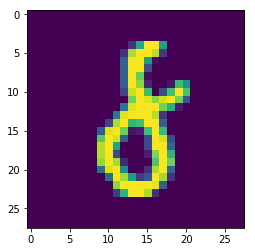

In [21]:
plt.imshow(mnist.train.images[9457].reshape(28,28))

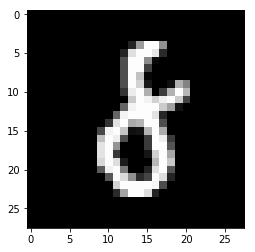

In [22]:
plt.imshow(mnist.train.images[9457].reshape(28,28),cmap='gist_gray')

## Outline the Model

In [37]:
input_size = 784
output_size = 10
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 1000

# Reset any variables left in memory from previous runs.
tf.reset_default_graph()

# As in the previous example - declare placeholders where the data will be fed into.
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

# Weights and biases for the first linear combination between the inputs and the first hidden layer.
# Use get_variable in order to make use of the default TensorFlow initializer which is Xavier.
weights_1 = tf.get_variable("weights_1", [input_size, hidden_layer_size])
biases_1 = tf.get_variable("biases_1", [hidden_layer_size])

# Operation between the inputs and the first hidden layer.
# We've chosen ReLu as our activation function. You can try playing with different non-linearities.
outputs_1 = tf.nn.relu(tf.matmul(inputs, weights_1) + biases_1)

# Weights and biases for the second linear combination.
# This is between the first and second hidden layers.
weights_2 = tf.get_variable("weights_2", [hidden_layer_size, hidden_layer_size])
biases_2 = tf.get_variable("biases_2", [hidden_layer_size])

# Operation between the first and the second hidden layers. Again, we use ReLu.
outputs_2 = tf.nn.relu(tf.matmul(outputs_1, weights_2) + biases_2)

# Weights and biases for the third linear combination.
# This is between the second and third hidden layers.
weights_3 = tf.get_variable("weights_3", [hidden_layer_size, hidden_layer_size])
biases_3 = tf.get_variable("biases_3", [hidden_layer_size])

# Operation between the first and the second hidden layers. Again, we use ReLu.
outputs_3 = tf.nn.relu(tf.matmul(outputs_2, weights_3) + biases_3)

# Weights and biases for the final linear combination.
# That's between the third hidden layer and the output layer.
weights_4 = tf.get_variable("weights_4", [hidden_layer_size, output_size])
biases_4 = tf.get_variable("biases_4", [output_size])

# Operation between the second hidden layer and the final output.
# Notice we have not used an activation function because we'll use the trick to include it directly in 
# the loss function. This works for softmax and sigmoid with cross entropy.
outputs = tf.matmul(outputs_3, weights_4) + biases_4

# Calculate the loss function for every output/target pair.
# The function used is the same as applying softmax to the last layer and then calculating cross entropy
# with the function we've seen in the lectures. This function, however, combines them in a clever way, 
# which makes it both faster and more numerically stable (when dealing with very small numbers).
# Logits here means: unscaled probabilities (so, the outputs, before they are scaled by the softmax)
# Naturally, the labels are the targets.
loss = tf.nn.softmax_cross_entropy_with_logits(logits=outputs, labels=targets)

# Get the average loss
mean_loss = tf.reduce_mean(loss)

# Define the optimization step. Using adaptive optimizers such as Adam in TensorFlow
# is as simple as that.
optimize = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(mean_loss)

# Get a 0 or 1 for every input in the batch indicating whether it output the correct answer out of the 10.
out_equals_target = tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1))

# Get the average accuracy of the outputs.
accuracy = tf.reduce_mean(tf.cast(out_equals_target, tf.float32))

# Declare the session variable.
sess = tf.InteractiveSession()

# Initialize the variables. Default initializer is Xavier.
initializer = tf.global_variables_initializer()
sess.run(initializer)

# Batching
batch_size = 100

# Calculate the number of batches per epoch for the training set.
batches_number = mnist.train._num_examples // batch_size

# Basic early stopping. Set a maximum number of epochs.
max_epochs = 15

# Keep track of the validation loss of the previous epoch.
# If the validation loss becomes increasing, we want to trigger early stopping.
# We initially set it at some arbitrarily high number to make sure we don't trigger it
# at the first epoch
prev_validation_loss = 9999999.

import time
start_time = time.time()

# Create a loop for the epochs. Epoch_counter is a variable which automatically starts from 0.
for epoch_counter in range(max_epochs):
    
    # Keep track of the sum of batch losses in the epoch.
    curr_epoch_loss = 0.
    
    # Iterate over the batches in this epoch.
    for batch_counter in range(batches_number):
        
        # Input batch and target batch are assigned values from the train dataset, given a batch size
        input_batch, target_batch = mnist.train.next_batch(batch_size)
        
        # Run the optimization step and get the mean loss for this batch.
        # Feed it with the inputs and the targets we just got from the train dataset
        _, batch_loss = sess.run([optimize, mean_loss], 
            feed_dict={inputs: input_batch, targets: target_batch})
        
        # Increment the sum of batch losses.
        curr_epoch_loss += batch_loss
    
    # So far curr_epoch_loss contained the sum of all batches inside the epoch
    # We want to find the average batch losses over the whole epoch
    # The average batch loss is a good proxy for the current epoch loss
    curr_epoch_loss /= batches_number
    
    # At the end of each epoch, get the validation loss and accuracy
    # Get the input batch and the target batch from the validation dataset
    input_batch, target_batch = mnist.validation.next_batch(mnist.validation._num_examples)
    
    # Run without the optimization step (simply forward propagate)
    validation_loss, validation_accuracy = sess.run([mean_loss, accuracy], 
        feed_dict={inputs: input_batch, targets: target_batch})
    
    # Print statistics for the current epoch
    # Epoch counter + 1, because epoch_counter automatically starts from 0, instead of 1
    # We format the losses with 3 digits after the dot
    # We format the accuracy in percentages for easier interpretation
    print('Epoch '+str(epoch_counter+1)+
          '. Mean loss: '+'{0:.3f}'.format(curr_epoch_loss)+
          '. Validation loss: '+'{0:.3f}'.format(validation_loss)+
          '. Validation accuracy: '+'{0:.2f}'.format(validation_accuracy * 100.)+'%')
    
    # Trigger early stopping if validation loss begins increasing.
    if validation_loss > prev_validation_loss:
        break
        
    # Store this epoch's validation loss to be used as previous validation loss in the next iteration.
    prev_validation_loss = validation_loss

# Not essential, but it is nice to know when the algorithm stopped working in the output section, 
# rather than check the kernel
print('End of training.')

#Add the time it took the algorithm to train
print("Training time: %s seconds" % (time.time() - start_time))

Epoch 1. Mean loss: 0.267. Validation loss: 0.117. Validation accuracy: 96.66%
Epoch 2. Mean loss: 0.092. Validation loss: 0.071. Validation accuracy: 97.96%
Epoch 3. Mean loss: 0.052. Validation loss: 0.069. Validation accuracy: 98.06%
Epoch 4. Mean loss: 0.033. Validation loss: 0.067. Validation accuracy: 98.00%
Epoch 5. Mean loss: 0.025. Validation loss: 0.068. Validation accuracy: 97.96%
End of training.
Training time: 165.65865921974182 seconds


## Test the Model

In [ ]:
input_batch, target_batch = mnist.test.next_batch(mnist.test._num_examples)
test_accuracy = sess.run([accuracy], 
    feed_dict={inputs: input_batch, targets: target_batch})

# Test accuracy is a list with 1 value, so we want to extract the value from it, using x[0]
# Uncomment the print to see how it looks before the manipulation
# print (test_accuracy)
test_accuracy_percent = test_accuracy[0] * 100.

# Print the test accuracy formatted in percentages
print('Test accuracy: '+'{0:.2f}'.format(test_accuracy_percent)+'%')